In [1]:
%pylab inline
from pylab import *
from statsmodels.tsa.stattools import acf
from mpl_toolkits.mplot3d import Axes3D
from toolz import juxt
from run import *

Populating the interactive namespace from numpy and matplotlib


In [16]:
def plot_3d(t, a):
    fig = figure()
    ax =fig.add_subplot(111, projection='3d')
    ax.plot(*a)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

# Functions for plotting samples
def plot_samples(df):
    figure()
    df[['sigma', 'beta', 'r']].plot(subplots=True)
    xlabel('Samples')
    
    return gcf()

def plot_kde(df):
    figure()
    axs = df[['sigma', 'beta' ,'r']].plot(kind='kde', subplots=True, sharex=False)
    
    return gcf()

def plot_acf(df, nlags=300):
    ncol = df.shape[1]
    fig, axs = subplots(ncol, 1, sharex=True)
    for ax, col in zip(axs.flat, df.columns):
        ac, confint = acf(df[col], nlags=nlags, alpha=.05)
        ax.plot(ac)
        ax.plot(confint,'r--')
        ax.set_ylabel(col)
        
    return fig
        

def plot_all(df, title):
    figs= juxt(plot_samples, plot_kde, plot_acf)(df)
    for fig in figs:
        fig.suptitle(title)
    return figs
        
def qrunplot(*args, **kwargs):
    df, title = sample(*args, **kwargs)
    plot_all(df.drop('noise',1), title)

In [3]:
style.use('slides')

## Plotting output of lorenz63 system

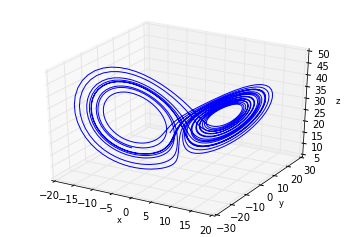

In [4]:
plot_3d(*run(nt=20/.01, r=28, noise=0.0))

## Analysis of Sampler

In [7]:
df, title = sample(N=2000, nt=10, tau=.5, beta=0.5, noise=1.0)

In [8]:
df.tail()

,sigma,beta,r,noise
1995,10.9193,2.79953,27.7121,1
1996,10.9193,2.79953,27.7121,1
1997,10.9193,2.79953,27.7121,1
1998,10.2485,2.81248,27.9543,1
1999,10.2485,2.81248,27.9543,1


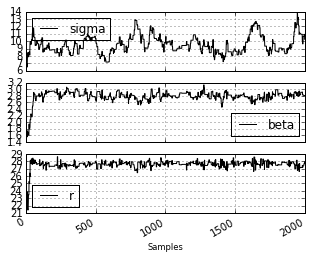

In [9]:
df[['sigma', 'beta', 'r']].plot(subplots=True, figsize=(5,4));
xlabel('Samples')

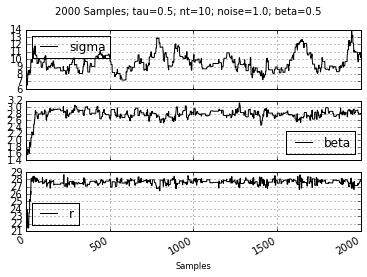

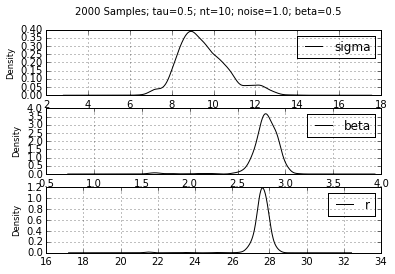

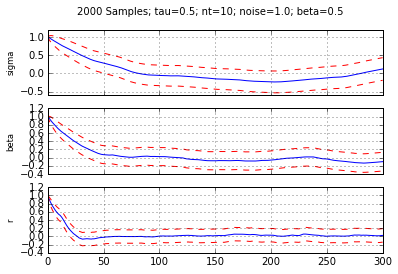

In [18]:
qrunplot(N=2000, nt=10, tau=.5, beta=0.5, noise=1.0)

It works for short times $\tau$, but fails for longer values.